# NYC Hotels Data 

While working on a project to automate generating NYC CEQR Reports, one of the datasets required for Commercial CEQR analysis was generating a search radius and then compiling a list of the hotels within that given search radius. Along with the list of the hotels within that search radius, one of the variables needed was a **count of the hotel rooms** that these hotels had. 

Our team identified three (3) sources for hotel data;

* Google Maps Places API query
* OpenStreetMap Overpass API query
* NYCGo.com, from NYC & Company, which includes the count of hotel rooms for each hotel in its database 

More about NYC & Company:

> NYC & Company is the official destination marketing organization (DMO) and convention and visitors bureau (CVB) for the five boroughs of New York City. Our mission is to maximize travel and tourism opportunities throughout the City, build economic prosperity and spread the dynamic image of New York City around the world.

> A 501(c) 6 private corporation, NYC & Company represents the interests of nearly 2,000 member organizations across the spectrum of businesses and organizations in the City.

> NYC & Company provides resources for visitors to discover everything they need to know about what to do and see in NYC. In addition to an integrated market development team in New York City with a focus on group, meeting/convention, leisure and events motivated travel, we have a global communications and market promotion network around the globe, including 17 representative offices on five continents, to promote visitation. Together with satellite convention sales offices in the US to develop group business, NYC & Company’s marketing efforts—both consumer and business facing—position the City to attract business and leisure travelers.  Source: https://business.nycgo.com/about-us/who-we-are/


## Why Hotel Room Counts may be useful 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NYC-Hotels-Data" data-toc-modified-id="NYC-Hotels-Data-1">NYC Hotels Data</a></span></li></ul></div>

In [6]:
from IPython.display import IFrame

IFrame(src='https://www.nycgo.com/plan-your-trip/hotels-in-nyc/', width=700, height=600)        

In [30]:
from nyc_hotel_data import get_nyc_go_hotels_data
from datetime import datetime
import pandas as pd
import geopandas as gpd
import folium

In [4]:
hotel_id_list = [
    "181547",
    "55876",
    "42879",
    "5122464",
    "183709",
    "56080",
    "244081",
    "56294",
    "182478",
    "76684",
    "466941",
    "3174621",
    "182542",
    "27752",
    "291324",
    "41649",
    "337776",
    "262828",
    "308187",
    "254395",
    "1817831",
    "242447",
    "1323959",
    "192082",
    "28040",
    "41657",
    "1670478",
    "2152283",
    "56243",
    "247713",
    "1803065",
    "247908",
    "617927",
    "59182",
    "57487",
    "187807",
    "1223168",
    "55846",
    "182259",
    "56028",
    "480235",
    "2012829",
    "442501",
    "587337",
    "431070",
    "1148349",
    "58958",
    "59552",
    "1330071",
    "59038",
    "2508842",
    "56087",
    "270216",
    "599531",
    "4125131",
    "1498530",
    "56941",
    "3961780",
    "56042",
    "1618352",
    "492830",
    "2178340",
    "543128",
    "617923",
    "56034",
    "430999",
    "75588",
    "57546",
    "187692",
    "1968984",
    "56423",
    "55890",
    "1150083",
    "235242",
    "270248",
    "584558",
    "56510",
    "181383",
    "186176",
    "599534",
    "386957",
    "558480",
    "182326",
    "57009",
    "79801",
    "56435",
    "1911599",
    "59713",
    "4063342",
    "262833",
    "1424666",
    "59304",
    "239117",
    "56343",
    "183566",
    "23156",
    "59751",
    "183788",
    "4542085",
    "1829019",
    "5018321",
    "1363911",
    "56021",
    "262647",
    "617915",
    "439306",
    "56667",
    "22467",
    "430962",
    "55825",
    "2769928",
    "1345044",
    "56937",
    "26976",
    "247914",
    "22296",
    "257298",
    "257313",
    "56409",
    "1397916",
    "259143",
    "57473",
    "2210104",
    "1341215",
    "57746",
    "599343",
    "492831",
    "181844",
    "24887",
    "302134",
    "262832",
    "58695",
    "56018",
    "606889",
    "1783402",
    "2291137",
    "484349",
    "56107",
    "56938",
    "423075",
    "329667",
    "56936",
    "1296042",
    "56113",
    "310740",
    "182258",
    "587439",
    "260798",
    "59518",
    "56035",
    "330730",
    "256968",
    "56166",
    "3175233",
    "1231967",
    "270490",
    "500155",
    "56167",
    "55861",
    "2645250",
    "255384",
    "244106",
    "1169919",
    "56927",
    "437516",
    "55830",
    "2082655",
    "55948",
    "443305",
    "2380425",
    "180769",
    "56552",
    "56429",
    "238114",
    "56800",
    "1566879",
    "56985",
    "1457823",
    "367632",
    "1315321",
    "530057",
    "56164",
    "266822",
    "278666",
    "241699",
    "543546",
    "56271",
    "184085",
    "743079",
    "182266",
    "55837",
    "5218600",
    "357419",
    "190591",
    "56939",
    "48003",
    "1639775",
    "4561710",
    "617917",
    "537218",
    "268972",
    "1575448",
    "3151109",
    "46601",
    "185999",
    "2064332",
    "182485",
    "3838991",
    "740453",
    "43396",
    "4905928",
    "2130903",
    "26961",
    "24900",
    "48440",
    "832865",
    "328408",
    "1975205",
    "59688",
    "1549663",
    "2219519",
    "2235216",
    "265391",
    "863263",
    "270767",
    "3725547",
    "191783",
    "4512743",
    "56276",
    "239080",
    "56106",
    "56876",
    "180614",
    "2332903",
    "79612",
    "246522",
    "3110493",
    "360589",
    "363004",
    "599532",
    "1670477",
    "1005792",
    "5347048",
    "1225214",
    "1693084",
    "1498024",
    "24727",
    "56029",
    "606887",
    "192074",
    "55952",
    "911236",
    "2070130",
    "1248380",
    "3752762",
    "55758",
    "76896",
    "547122",
    "1719285",
    "2152284",
    "1338472",
    "606890",
    "3158295",
    "59521",
    "905473",
    "2031539",
    "793402",
    "4125132",
    "248435",
    "56700",
    "1687908",
    "465664",
    "1018299",
    "25294",
    "76799",
    "56508",
    "483674",
    "187699",
    "617931",
    "22639",
    "75911",
    "1530887",
    "2016822",
    "56880",
    "56575",
    "1078432",
    "706006",
    "2255044",
    "56921",
    "3390635",
    "500365",
    "1357899",
    "1446320",
    "56740",
]

In [13]:
dt_string = datetime.now().strftime("%Y-%d-%m_%H-%M-%S")

get_nyc_go_hotels_data(
    hotel_id_list, 
    'data/nyc_go_hotels_{}.csv'.format(dt_string)
)

In [14]:
dt_string = '2020-26-03_13-57-39'

df = pd.read_csv('data/nyc_go_hotels_{}.csv'.format(dt_string))

In [18]:
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
)

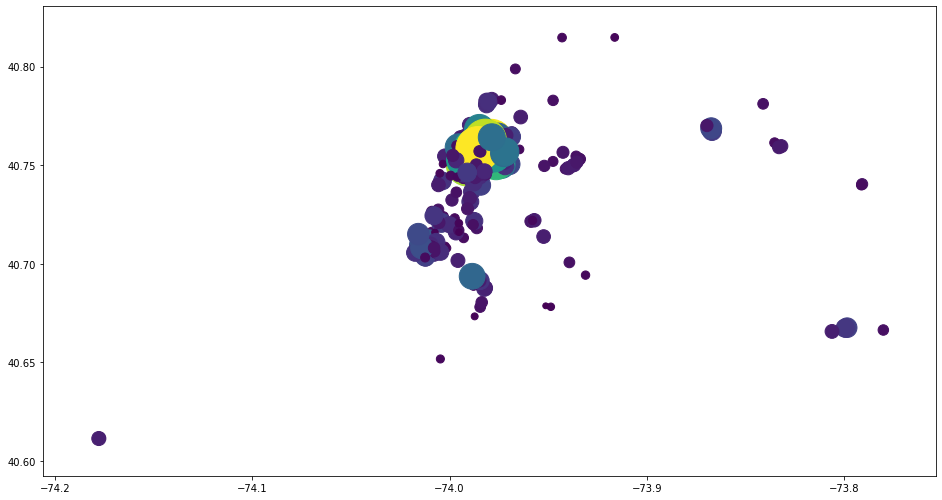

In [29]:
gdf.plot(column=gdf['num_rooms'], s=gdf['num_rooms'], figsize=(16, 16));

In [42]:
gdf.head()

,hotel_id,longitude,latitude,num_rooms,city,zip_code,hotel_type_id,city_id,address,hotel_class,name,district_id,url,geometry
0,181547,-73.83182,40.75967,173,Queens,NY 11354,204,20089077,135-20 39th Avenue,3,Sheraton LaGuardia East Hotel,1538,https://www.booking.com/hotel/us/sheraton-lagu...,POINT (-73.83182 40.75967)
1,55876,-73.98305,40.74278,131,New York,NY 10016,204,20088325,124 East 28th Street,4,"Park South, a Joie de Vivre Hotel",929,https://www.booking.com/hotel/us/park-south.html,POINT (-73.98305 40.74278)
2,42879,-73.98553,40.74463,337,New York,NY 10016,204,20088325,22 East 29th Street,4,The James New York - NoMad,929,https://www.booking.com/hotel/us/the-james-new...,POINT (-73.98553 40.74463)
3,5122464,-73.98950,40.73152,286,New York,10003,204,20088325,112 East 11th Street,4,Moxy NYC East Village,929,https://www.booking.com/hotel/us/moxy-nyc-east...,POINT (-73.98950 40.73152)
4,183709,-73.98667,40.74669,172,New York,NY 10001,204,20088325,4 West 31st Street,3,Hotel Wolcott,929,https://www.booking.com/hotel/us/wolcott.html,POINT (-73.98667 40.74669)


In [44]:
df.isnull().sum()

hotel_id         0
longitude        0
latitude         0
num_rooms        0
city             0
zip_code         0
hotel_type_id    0
city_id          0
address          0
hotel_class      0
name             0
district_id      0
url              0
geometry         0
dtype: int64

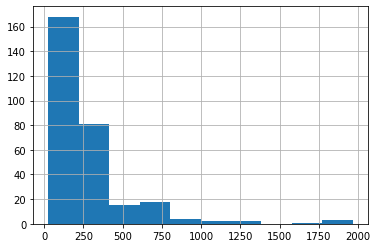

In [45]:
df.num_rooms.hist()

In [82]:

import folium

gdf_geojson = gdf.to_json()

m = folium.Map(location=[40.748433, -73.985656], tiles="cartodbpositron", zoom_start=14)

for i, row in df.iterrows():
    #print(df.iloc[i]['longitude'], df.iloc[i]['latitude'])
        
    folium.Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup=f'<a href="{df.iloc[i]["url"]}" target="_blank">{df.iloc[i]["name"]}</a> </br> - Rooms: {df.iloc[i]["num_rooms"]}</a>',
        #radius=10000,
        radius=int(df.iloc[i]['num_rooms'])*0.25,
        color='crimson',
        fill=True,
        fill_color='crimson',
        name='NYC Hotels Room Counts'
    ).add_to(m)

folium.LayerControl().add_to(m)
    
m

In [83]:
m.save('index.html')

In [85]:
gdf.to_file('data/nyc_hotels.geojson', driver='GeoJSON')